In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def hmg_point_cdf(t, rate):
    return 1 - np.exp(- rate * t)

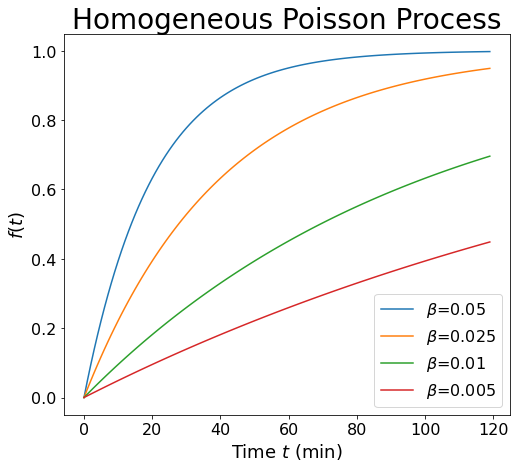

In [3]:
t_time = np.arange(120)
plt.figure(figsize=(8, 7))
plt.plot(hmg_point_cdf(t_time, 0.05), label=r'$\beta$=0.05')
plt.plot(hmg_point_cdf(t_time, 0.025), label=r'$\beta$=0.025')
plt.plot(hmg_point_cdf(t_time, 0.01), label=r'$\beta$=0.01')
plt.plot(hmg_point_cdf(t_time, 0.005), label=r'$\beta$=0.005')
plt.legend(fontsize=16)
plt.xlabel(r'Time $t$ (min)', fontsize=18)
plt.ylabel(r'$f(t)$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Homogeneous Poisson Process', fontsize=28)
plt.savefig('figures/examples/homogeneous_poisson.png')

In [4]:
def repair_fraction(t, m, beta, theta):
    return (1 - np.exp(- np.power(beta * t, m))) * theta

In [5]:
def repair_derivative(t, m, beta, theta):
    return theta * m * beta**m * t **(m - 1) * (1 - repair_fraction(t, m, beta, theta) / theta)

In [6]:
def ihg_point_cdf(drate):
    return 1 - np.exp(- np.cumsum(drate))

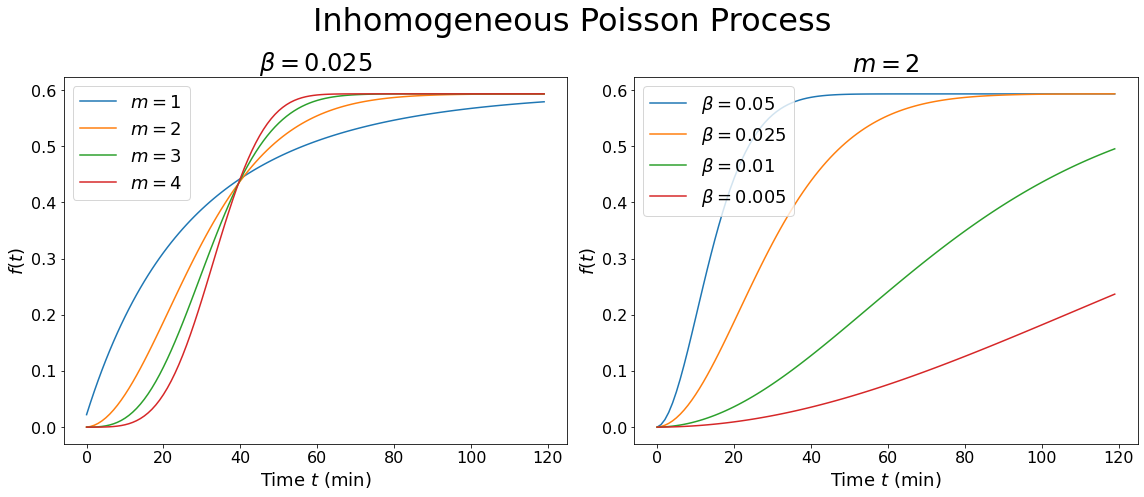

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(16, 7))
ax[0].plot(ihg_point_cdf(repair_derivative(t_time, 1, .025, .9)), label=r'$m=1$')
ax[0].plot(ihg_point_cdf(repair_derivative(t_time, 2, .025, .9)), label=r'$m=2$')  
ax[0].plot(ihg_point_cdf(repair_derivative(t_time, 3, .025, .9)), label=r'$m=3$')         
ax[0].plot(ihg_point_cdf(repair_derivative(t_time, 4, .025, .9)), label=r'$m=4$')         

ax[1].plot(ihg_point_cdf(repair_derivative(t_time, 2, .05, .9)), label=r'$\beta=0.05$')
ax[1].plot(ihg_point_cdf(repair_derivative(t_time, 2, .025, .9)), label=r'$\beta=0.025$')
ax[1].plot(ihg_point_cdf(repair_derivative(t_time, 2, .01, .9)), label=r'$\beta=0.01$')
ax[1].plot(ihg_point_cdf(repair_derivative(t_time, 2, .005, .9)), label=r'$\beta=0.005$')

for a in ax.flatten():
    a.set_xlabel(r'Time $t$ (min)', fontsize=18)
    a.set_ylabel(r'$f(t)$', fontsize=18)
    a.legend(fontsize=18)
    a.tick_params(axis='x', labelsize=16)
    a.tick_params(axis='y', labelsize=16)
    
ax[0].set_title(r'$\beta=0.025$', fontsize=24)
ax[1].set_title(r'$m=2$', fontsize=24)
fig.suptitle('Inhomogeneous Poisson Process', fontsize=32)
fig.tight_layout()
plt.savefig('figures/examples/inhomogeneous_poisson.png')